In [ ]:
# Define a function to extract the month from the first timestamp
def extract_month(timestamps):
    # Check if timestamps is a valid array-like object
    if isinstance(timestamps, (np.ndarray, list)) and len(timestamps) > 0:
        # Check if the first element is not None and not NaN
        first_timestamp = timestamps[0]
        if pd.notna(first_timestamp):
            try:
                # Convert to datetime object
                datetime_obj = pd.to_datetime(first_timestamp)
                # Extract month
                return datetime_obj.month
            except (ValueError, TypeError):
                return np.nan  # Return NaN if conversion fails
    return np.nan 

In [405]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import os
import sys
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt    
import re
import pickle
import matplotlib.patches as mpatches
from statsmodels.graphics.mosaicplot import mosaic
from tabulate import tabulate

sys.path.insert(1, '../')
from Prepare_Events_Functions import *
from Plot_events_functions import *

In [704]:
color_mapping = {
    'F2': (0.0, 0.0, 1.0, 0.6),    # darkblue with 0.6 alpha
    'F1': (0.0, 0.6902, 1.0, 0.6), # deepskyblue with 0.6 alpha
    'C': (0.5, 0.5, 0.5, 0.6),     # grey with 0.6 alpha
    'B1': (0.8039, 0.0, 0.0, 0.6), # indianred with 0.6 alpha
    'B2': (0.5451, 0.0, 0.0, 0.6)}  # darkred with 0.6 alpha

color_mapping_seasons = {
    'Summer': (1.0, 0.6471, 0.0, 0.6), # orange with 0.6 alpha
    'Winter': (0.0, 0.0, 1.0, 0.6)}     # blue with 0.6 alpha}

quintile_mapping = {1: 'F2', 2: 'F1', 3: 'C', 4: 'B1', 5: 'B2'}
quintile_cats_loading = ['F2','F1', 'C', 'B1', 'B2']
n= 5
quintile_cats_season = ['Winter', 'Summer']    

# Read in data
For events with n data points which is a multiple of 5

In [566]:
with open(f"/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/UKCP18_30mins/bc005/profiles_df.pkl", 'rb') as f:
    bc005 = pickle.load(f)    
bc005['month'] = bc005['times'].apply(extract_month)

In [710]:
with open(f"/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/UKCP18_30mins/bb198/profiles_df.pkl", 'rb') as f:
    bb198 = pickle.load(f)   
bb198['month'] = bb198['times'].apply(extract_month)

In [708]:
with open(f"/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/UKCP18_30mins/bb189/profiles_df.pkl", 'rb') as f:
    bb189 = pickle.load(f)     
bb189['month'] = bb189['times'].apply(extract_month)    

In [691]:
with open(f"/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/NIMROD_30mins/WholeYear/NIMROD_2.2km_filtered_100_profiles_df.pkl", 'rb') as f:
    nimrod = pickle.load(f)  
nimrod['month'] = nimrod['times'].apply(extract_month)    

## Create trimmed versions of dataframes

In [782]:
nimrod_divisibleby5 = nimrod[nimrod['precip'].apply(is_multiple_of_5)]
nimrod_shortdurations = nimrod[nimrod["duration"]<6]
nimrod_longdurations = nimrod[nimrod["duration"]>=6]
nimrod_shortdurations_divisibleby5 = nimrod_shortdurations[nimrod_shortdurations['precip'].apply(is_multiple_of_5)]
nimrod_longdurations_divisibleby5 = nimrod_longdurations[nimrod_longdurations['precip'].apply(is_multiple_of_5)]
nimrod_summer = nimrod[nimrod["season"]=='Summer']
nimrod_summer_divisibleby5 = nimrod_summer[nimrod_summer['precip'].apply(is_multiple_of_5)]

In [787]:
bc005_divisibleby5 = bc005[bc005['precip'].apply(is_multiple_of_5)]
bc005_shortdurations = bc005[bc005["duration"]<6]
bc005_longdurations = bc005[bc005["duration"]>=6]
bc005_shortdurations_divisibleby5 = bc005_shortdurations[bc005_shortdurations['precip'].apply(is_multiple_of_5)]
bc005_longdurations_divisibleby5 = bc005_longdurations[bc005_longdurations['precip'].apply(is_multiple_of_5)]
bc005_summer = bc005[bc005["season"]=='Summer']
bc005_summer_divisibleby5 = bc005_summer[bc005_summer['precip'].apply(is_multiple_of_5)]

In [788]:
bb198_divisibleby5 = bb198[bb198['precip'].apply(is_multiple_of_5)]
bb198_shortdurations = bb198[bb198["duration"]<6]
bb198_longdurations = bb198[bb198["duration"]>=6]
bb198_shortdurations_divisibleby5 = bb198_shortdurations[bb198_shortdurations['precip'].apply(is_multiple_of_5)]
bb198_longdurations_divisibleby5 = bb198_longdurations[bb198_longdurations['precip'].apply(is_multiple_of_5)]
bb198_summer = bb198[bb198["season"]=='Summer']
bb198_summer_divisibleby5 = bb198_summer[bb198_summer['precip'].apply(is_multiple_of_5)]

In [785]:
bb189_divisibleby5 = bb189[bb189['precip'].apply(is_multiple_of_5)]
bb189_shortdurations = bb189[bb189["duration"]<6]
bb189_longdurations = bb189[bb189["duration"]>=6]
bb189_shortdurations_divisibleby5 = bb189_shortdurations[bb189_shortdurations['precip'].apply(is_multiple_of_5)]
bb189_longdurations_divisibleby5 = bb189_longdurations[bb189_longdurations['precip'].apply(is_multiple_of_5)]
bb189_summer = bb189[bb189["season"]=='Summer']
bb189_summer_divisibleby5 = bb189_summer[bb189_summer['precip'].apply(is_multiple_of_5)]

# Check the number of events we have for each dataset
The number of files for UKCP18 present and future is similar. The difference between the two is likely because of differences in deletion of duplicate events.  

The number of files for NIMROD is less:
- This is likely because NIMROD includes 15 years of data (2006-2020) compared to 19 years for the UKCP18 datasets (2001-2019 and 2061-2079). 
- If we divide the number of events by the number of years over which they are calculated the result is now similar.

In [254]:
print(f"There are {len(bc005)} UKCP18 present")
# print(len(ukcp18_future_new[ukcp18_future_new['Profile'].notnull()]))
print(f"There are {len(bb198)} UKCP18 future")
print(f"There are {len(nimrod)} NIMROD files")

There are 125253 UKCP18 present
There are 112275 UKCP18 future
There are 89008 NIMROD files


In [255]:
print(f"There are {len(ukcp18_present)} UKCP18 present")
# print(len(ukcp18_future_new[ukcp18_future_new['Profile'].notnull()]))
print(f"There are {len(ukcp18_future)} UKCP18 future")
print(f"There are {len(nimrod)} NIMROD files")

There are 125253 UKCP18 present
There are 112275 UKCP18 future
There are 89008 NIMROD files


In [256]:
print(int(len(ukcp18_present)/19))
print(int(len(ukcp18_future)/19))
print(int(len(nimrod)/15))

6592
5909
5933


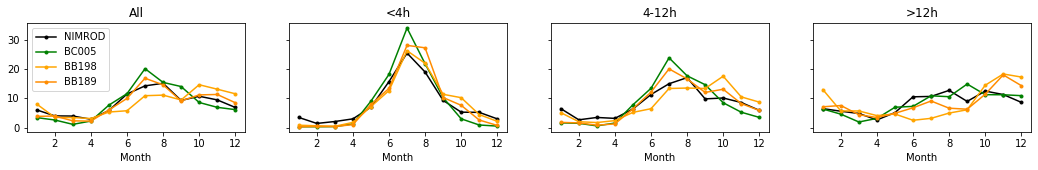

In [678]:
fig,axs=plt.subplots(ncols=4, figsize=(18,2), sharey=True)
plot_monthly_spread_byduration(axs[0], nimrod, bc005, bb198, bb189, 0, 1200, 'All')
plot_monthly_spread_byduration(axs[1], nimrod, bc005, bb198, bb189, 0, 4, '<4h')
plot_monthly_spread_byduration(axs[2], nimrod, bc005, bb198, bb189, 4, 12, '4-12h')
plot_monthly_spread_byduration(axs[3], nimrod, bc005, bb198, bb189, 12, 1200, '>12h')
axs[0].legend();

Text(0.5, 0.98, '')

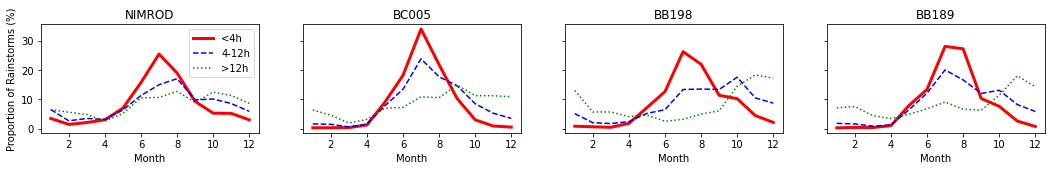

In [690]:
fig,axs=plt.subplots(ncols=4, figsize=(18,2), sharey=True)
plot_monthly_spread_bydataset(axs[0], nimrod, 'black', 'NIMROD')
plot_monthly_spread_bydataset(axs[1], bc005, 'green', 'BC005')
plot_monthly_spread_bydataset(axs[2], bb198, 'orange', 'BB198')
plot_monthly_spread_bydataset(axs[3], bb189, 'darkorange', 'BB189')
axs[0].set_ylabel('Proportion of Rainstorms (%)')
axs[0].legend();
fig.suptitle('')

## Is it possible to select just events from certain years - would this make results more similar?
Makes no difference

## NIMROD and UKCP18 present seasonal split in different years

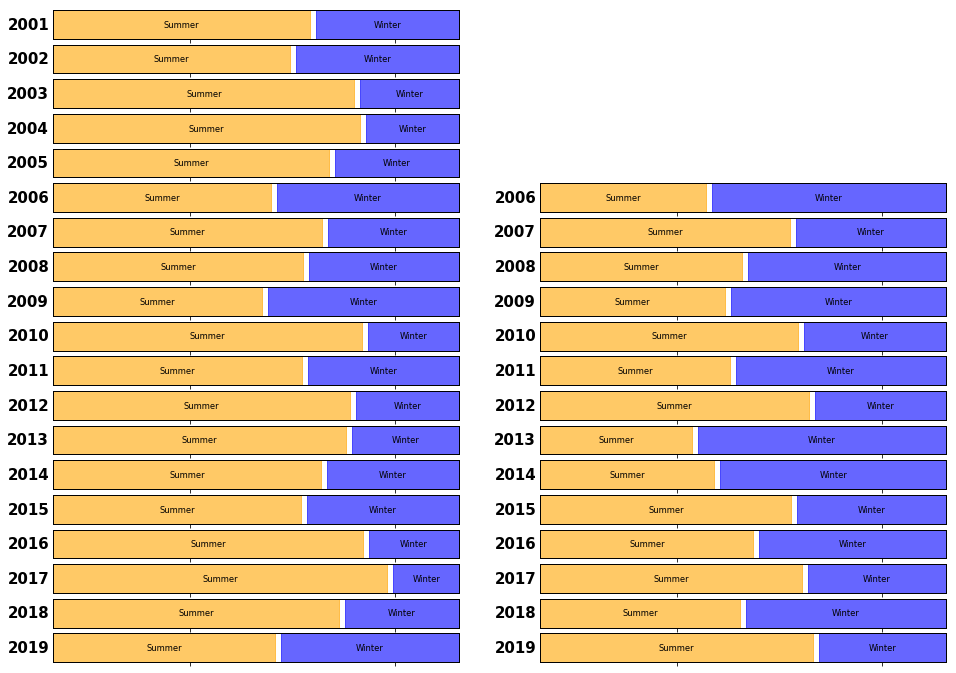

In [257]:
fig, axs = plt.subplots(nrows=19, ncols =2, figsize=(16, 12), sharex=True)
for number, year in enumerate(range(2001,2020)):
    trimmed = bc005[bc005['Year'] == year]
    create_single_variable_mosaic_plot(axs[number, 0], trimmed, 'season', quintile_cats_season, color_mapping_seasons, year, False)
for number, year in enumerate(range(2001,2020)):
    if year in range(2001,2006):
        axs[number,1].remove()
    else:
        trimmed = nimrod[nimrod['Year'] == year]
        create_single_variable_mosaic_plot(axs[number,1], trimmed, 'season', quintile_cats_season, color_mapping_seasons, year, False) 


# UKCP18 present and future

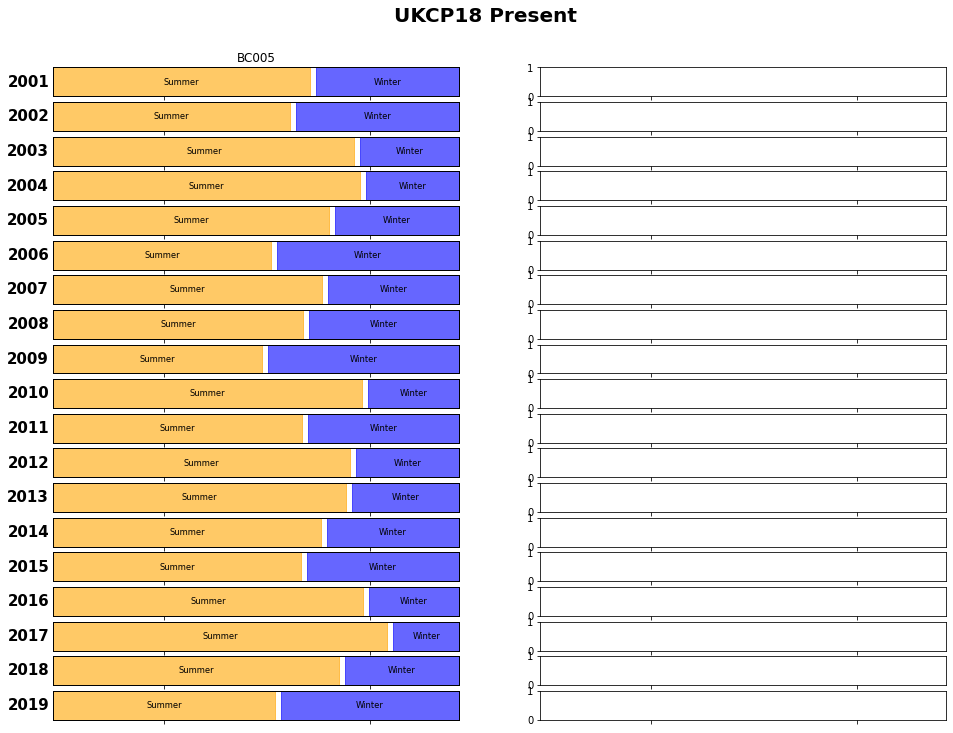

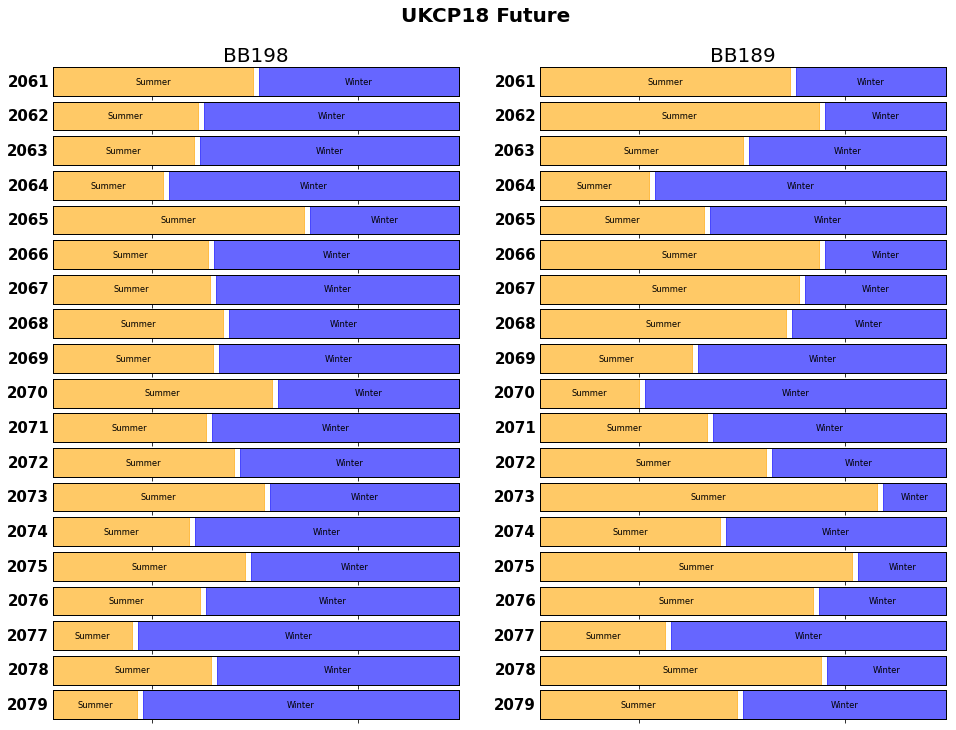

In [267]:
fig, axs = plt.subplots(nrows=19, ncols =2, figsize=(16, 12), sharex=True)
for number, year in enumerate(range(2001,2020)):
    trimmed = bc005[bc005['Year'] == year]
    create_single_variable_mosaic_plot(axs[number, 0], trimmed, 'season', quintile_cats_season, color_mapping_seasons, year, False)
axs[0,0].set_title('BC005', fontsize=20)
fig.suptitle('UKCP18 Present', fontweight="bold", fontsize=20, y=0.95)
# for number, year in enumerate(range(2001,2020)):
#     trimmed = bc005[bc005['Year'] == year]
#     create_single_variable_mosaic_plot(axs[number, 0], trimmed, 'season', quintile_cats_season, color_mapping_seasons, year, False)

fig, axs = plt.subplots(nrows=19, ncols =2, figsize=(16, 12), sharex=True)
for number, year in enumerate(range(2061,2080)):
    trimmed = bb198[bb198['Year'] == year]
    create_single_variable_mosaic_plot(axs[number, 0], trimmed, 'season', quintile_cats_season, color_mapping_seasons, year, False)
axs[0,0].set_title('BB198', fontsize=20)
for number, year in enumerate(range(2061,2080)):
    trimmed = bb189[bb189['Year'] == year]
    create_single_variable_mosaic_plot(axs[number, 1], trimmed, 'season', quintile_cats_season, color_mapping_seasons, year, False)
axs[0,1].set_title('BB189',  fontsize=20)
fig.suptitle('UKCP18 Future', fontweight="bold", fontsize=20, y=0.95);

# Seasonality of AMAX events
There are more events in summer in UKCP18 than in NIMROD.  
There are more events in summer in UKCP18 present than UKCP18 future.

This includes events that are too short to be used in the profiling.

The only reason I can think for this, is missing data in NIMROD. I can't think of anyway to check this.

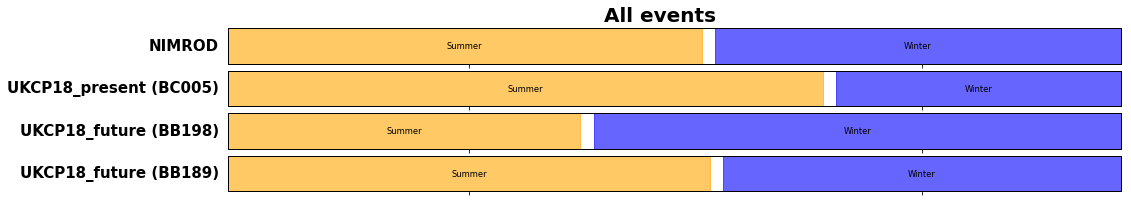

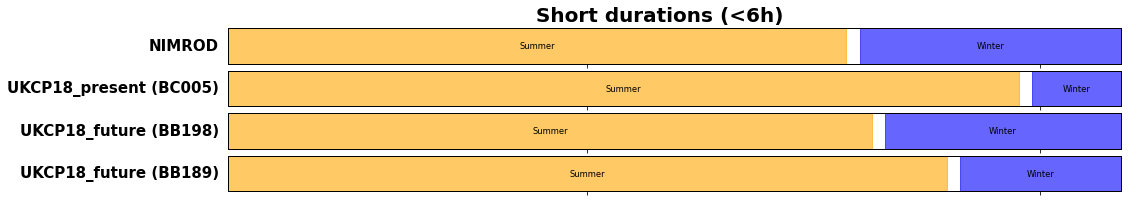

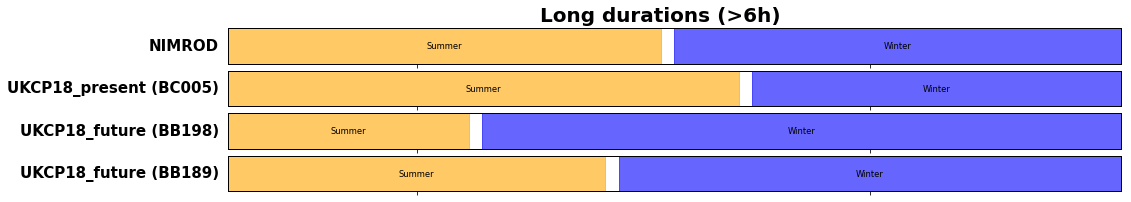

In [270]:
fig, axs = plt.subplots(nrows=4, figsize=(16, 3), sharex=True)  # Adjusted figure size
# Plot with custom labels
create_single_variable_mosaic_plot(axs[0], nimrod, 'season', quintile_cats_season, color_mapping_seasons, 'NIMROD', False)
create_single_variable_mosaic_plot(axs[1], bc005, 'season', quintile_cats_season, color_mapping_seasons, 'UKCP18_present (BC005)', False)
create_single_variable_mosaic_plot(axs[2], bb198, 'season', quintile_cats_season, color_mapping_seasons, 'UKCP18_future (BB198)', False)
create_single_variable_mosaic_plot(axs[3], bb189, 'season', quintile_cats_season, color_mapping_seasons, 'UKCP18_future (BB189)', False)
fig.suptitle('All events', fontweight="bold", fontsize=20);

fig, axs = plt.subplots(nrows=4, figsize=(16, 3), sharex=True)  # Adjusted figure size
# Plot with custom labels
create_single_variable_mosaic_plot(axs[0], nimrod_shortdurations, 'season', quintile_cats_season, color_mapping_seasons, 'NIMROD', False)
create_single_variable_mosaic_plot(axs[1], bc005_shortdurations, 'season', quintile_cats_season, color_mapping_seasons, 'UKCP18_present (BC005)', False)
create_single_variable_mosaic_plot(axs[2], bb198_shortdurations, 'season', quintile_cats_season, color_mapping_seasons, 'UKCP18_future (BB198)', False)
create_single_variable_mosaic_plot(axs[3], bb189_shortdurations, 'season', quintile_cats_season, color_mapping_seasons, 'UKCP18_future (BB189)', False)
fig.suptitle('Short durations (<6h)', fontweight="bold", fontsize=20);

fig, axs = plt.subplots(nrows=4, figsize=(16, 3), sharex=True)  # Adjusted figure size
# Plot with custom labels
create_single_variable_mosaic_plot(axs[0], nimrod_longdurations, 'season', quintile_cats_season, color_mapping_seasons, 'NIMROD', False)
create_single_variable_mosaic_plot(axs[1], bc005_longdurations, 'season', quintile_cats_season, color_mapping_seasons, 'UKCP18_present (BC005)', False)
create_single_variable_mosaic_plot(axs[2], bb198_longdurations, 'season', quintile_cats_season, color_mapping_seasons, 'UKCP18_future (BB198)', False)
create_single_variable_mosaic_plot(axs[3], bb189_longdurations, 'season', quintile_cats_season, color_mapping_seasons, 'UKCP18_future (BB189)', False)
fig.suptitle('Long durations (>6h)', fontweight="bold", fontsize=20);


# <ins>Loading of AMAX events<ins>

## Difference between events divisible by 5 and all events
Choosing only events with a number of data points divisible by 5 the number of events in front loaded categories decreases and the number of events in back loaded categories increases.

### Questions:
- Does normalising the data make a difference to the profile classification?
    - Compare for raw rain, and the interpolated profiles
- Classifying based on the raw data, rather than interpolated profiles, does it make a difference if we just consider profiles of a length divisible by 5?
- Do we get similar results using raw data, for just events divisible by 5, as we do for profiles interpolated to length 15?
    - Can we also check a comparison between events divisible by 5 and those not divisible by 5, for the interpolated profiles
- How different are the results for profiles interpolated to length 12 and length 15?

In [293]:
# row_num = 9461 #9459
# fig,axs=plt.subplots(ncols=3, figsize=(15,2))
# find_part_with_most_rain(data_divisibleby5['precip'][9461], 5, True, axs[0])
# find_part_with_most_rain(data_divisibleby5['interpolated15_incremental_normalized_rainfall'][9461], 5, True, axs[1])
# find_part_with_most_rain(data_divisibleby5['interpolated12_incremental_normalized_rainfall'][9461], 5, True, axs[2])

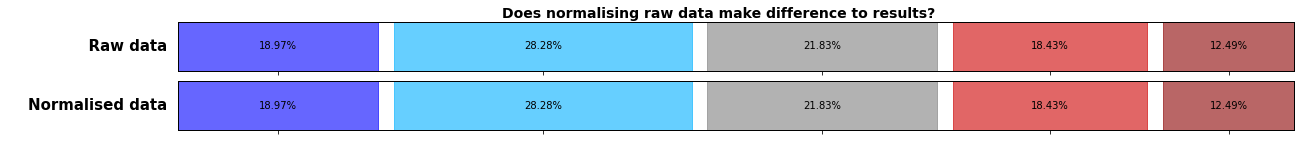

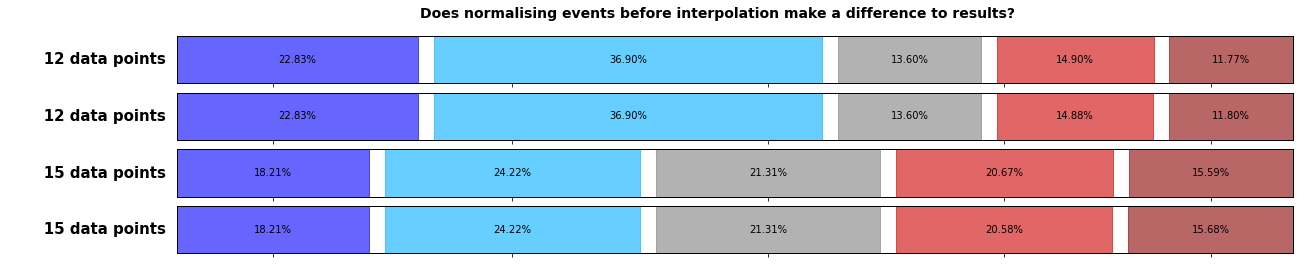

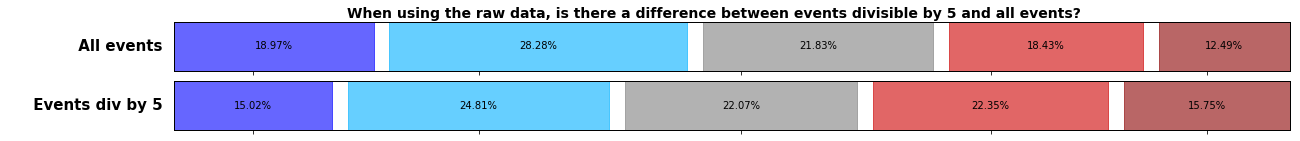

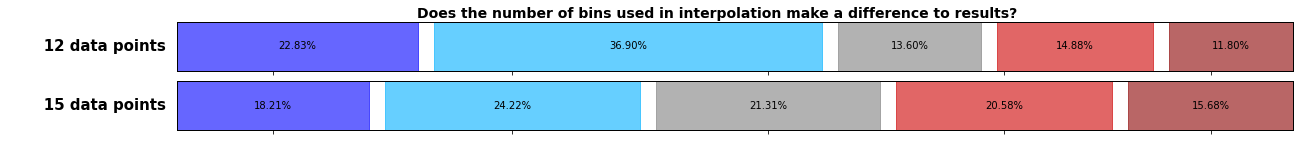

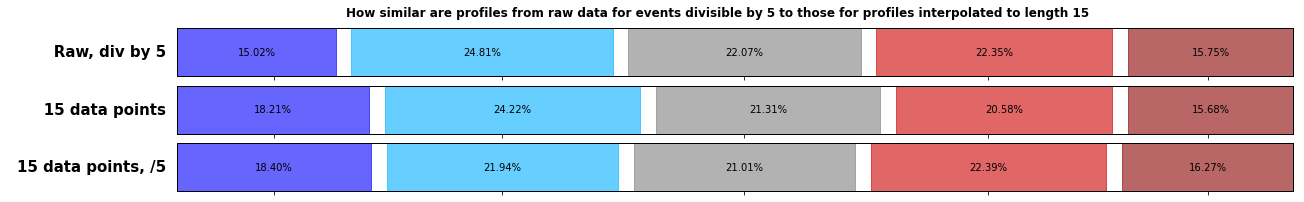

In [295]:
data = bb198
data_divisibleby5 = bb198_divisibleby5

fig, axs = plt.subplots(nrows=2, figsize=(20,2), sharex=True)
create_single_variable_mosaic_plot_pctlabels(axs[0], data,  'Loading_profile_raw_rain',quintile_cats, color_mapping, '      Raw data', True)
create_single_variable_mosaic_plot_pctlabels(axs[1], data,  'Loading_profile_normalised_rain',quintile_cats, color_mapping, '    Normalised data', True)
fig.suptitle("Does normalising raw data make difference to results?", fontweight="bold", fontsize=14)

fig, axs = plt.subplots(nrows=4, figsize=(20,4), sharex=True)
create_single_variable_mosaic_plot_pctlabels(axs[0], data,'Loading_profile12',quintile_cats, color_mapping, '       12 data points', True)
create_single_variable_mosaic_plot_pctlabels(axs[1], data,'Loading_profile_norm_12',quintile_cats, color_mapping, '       12 data points', True)
create_single_variable_mosaic_plot_pctlabels(axs[2], data,'Loading_profile15',quintile_cats, color_mapping, '       15 data points', True)
create_single_variable_mosaic_plot_pctlabels(axs[3], data,'Loading_profile_norm_15',quintile_cats, color_mapping, '       15 data points', True)
fig.suptitle('Does normalising events before interpolation make a difference to results?', fontweight="bold", fontsize=14);

fig, axs = plt.subplots(nrows=2, figsize=(20,2), sharex=True)
create_single_variable_mosaic_plot_pctlabels(axs[0], data,'Loading_profile_raw_rain',quintile_cats, color_mapping, '     All events', True)
create_single_variable_mosaic_plot_pctlabels(axs[1], data_divisibleby5, 'Loading_profile_raw_rain',quintile_cats, color_mapping, '     Events div by 5', True)
fig.suptitle("When using the raw data, is there a difference between events divisible by 5 and all events?", fontweight="bold", fontsize=14)

fig, axs = plt.subplots(nrows=2, figsize=(20,2), sharex=True)
create_single_variable_mosaic_plot_pctlabels(axs[0], data, 'Loading_profile_norm_12',quintile_cats, color_mapping, '       12 data points', True)
create_single_variable_mosaic_plot_pctlabels(axs[1], data, 'Loading_profile_norm_15',quintile_cats, color_mapping, '       15 data points', True)
fig.suptitle('Does the number of bins used in interpolation make a difference to results?', fontweight="bold", fontsize=14);

fig, axs = plt.subplots(nrows=3, figsize=(20,3), sharex=True)
create_single_variable_mosaic_plot_pctlabels(axs[0], data_divisibleby5,  'Loading_profile_raw_rain',quintile_cats, color_mapping, '       Raw, div by 5', True)
create_single_variable_mosaic_plot_pctlabels(axs[1], data,  'Loading_profile_norm_15',quintile_cats, color_mapping, '       15 data points', True)
create_single_variable_mosaic_plot_pctlabels(axs[2], data_divisibleby5, 'Loading_profile_norm_15',quintile_cats, color_mapping, '15 data points, /5', True)
fig.suptitle('How similar are profiles from raw data for events divisible by 5 to those for profiles interpolated to length 15', fontweight="bold");

## Most reliable to classify event profiles:
- Raw events divisible by 5
- Interpolated profiles with 15 points

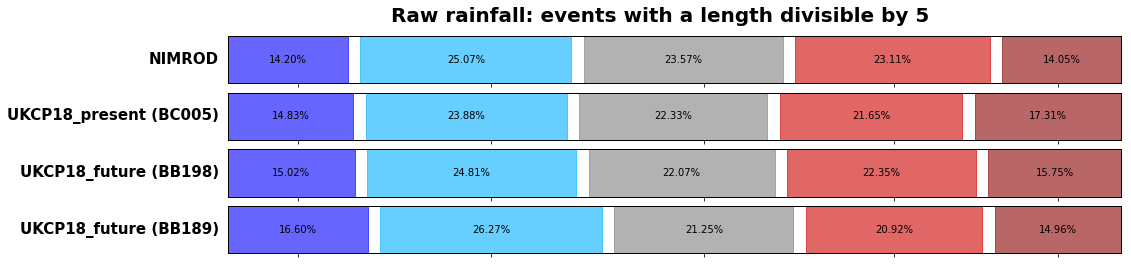

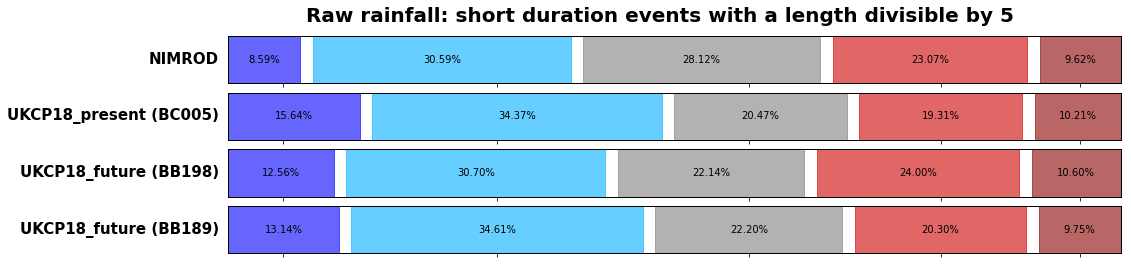

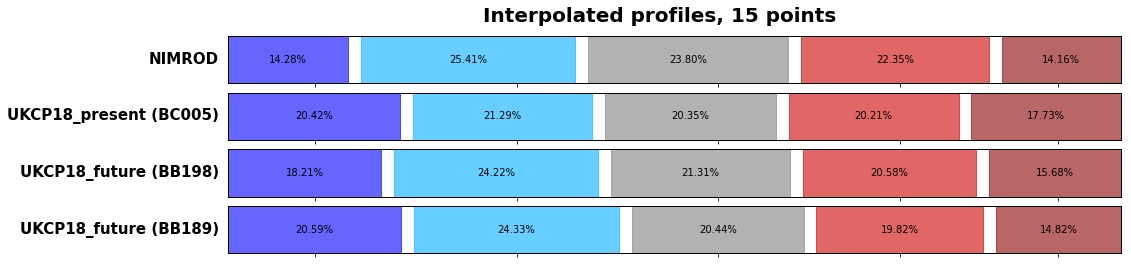

In [304]:
# Desired order of loading categories
fig, axs = plt.subplots(nrows =4, figsize=(16,4), sharex=True)
create_single_variable_mosaic_plot_pctlabels(axs[0], nimrod_divisibleby5, 'Loading_profile_raw_rain',quintile_cats, color_mapping, 'NIMROD', True)
create_single_variable_mosaic_plot_pctlabels(axs[1], bc005_divisibleby5, 'Loading_profile_raw_rain',quintile_cats, color_mapping, 'UKCP18_present (BC005)', True)
create_single_variable_mosaic_plot_pctlabels(axs[2], bb198_divisibleby5, 'Loading_profile_raw_rain',quintile_cats, color_mapping, 'UKCP18_future (BB198)', True)
create_single_variable_mosaic_plot_pctlabels(axs[3], bb189_divisibleby5, 'Loading_profile_raw_rain',quintile_cats, color_mapping, 'UKCP18_future (BB189)', True)
fig.suptitle('Raw rainfall: events with a length divisible by 5', fontweight="bold", fontsize=20);

# Desired order of loading categories
# fig, axs = plt.subplots(nrows =4, figsize=(16,4), sharex=True)
# create_single_variable_mosaic_plot_pctlabels(axs[0], nimrod_shortdurations, 'Loading_profile_raw_rain',quintile_cats, color_mapping, 'NIMROD', True)
# create_single_variable_mosaic_plot_pctlabels(axs[1], bc005_shortdurations, 'Loading_profile_raw_rain',quintile_cats, color_mapping, 'UKCP18_present (BC005)', True)
# create_single_variable_mosaic_plot_pctlabels(axs[2], bb198_shortdurations, 'Loading_profile_raw_rain',quintile_cats, color_mapping, 'UKCP18_future (BB198)', True)
# create_single_variable_mosaic_plot_pctlabels(axs[3], bb189_shortdurations, 'Loading_profile_raw_rain',quintile_cats, color_mapping, 'UKCP18_future (BB189)', True)
# fig.suptitle('Raw rainfall: just short duration events', fontweight="bold", fontsize=20);

# Desired order of loading categories
fig, axs = plt.subplots(nrows =4, figsize=(16,4), sharex=True)
create_single_variable_mosaic_plot_pctlabels(axs[0], nimrod_shortdurations_divisibleby5, 'Loading_profile_raw_rain',quintile_cats, color_mapping, 'NIMROD', True)
create_single_variable_mosaic_plot_pctlabels(axs[1], bc005_shortdurations_divisibleby5, 'Loading_profile_raw_rain',quintile_cats, color_mapping, 'UKCP18_present (BC005)', True)
create_single_variable_mosaic_plot_pctlabels(axs[2], bb198_shortdurations_divisibleby5, 'Loading_profile_raw_rain',quintile_cats, color_mapping, 'UKCP18_future (BB198)', True)
create_single_variable_mosaic_plot_pctlabels(axs[3], bb189_shortdurations_divisibleby5, 'Loading_profile_raw_rain',quintile_cats, color_mapping, 'UKCP18_future (BB189)', True)
fig.suptitle('Raw rainfall: short duration events with a length divisible by 5', fontweight="bold", fontsize=20);


# # # Desired order of loading categories
fig, axs = plt.subplots(nrows =4, figsize=(16,4), sharex=True)
create_single_variable_mosaic_plot_pctlabels(axs[0], nimrod, 'Loading_profile_norm_15',quintile_cats, color_mapping, 'NIMROD', True)
create_single_variable_mosaic_plot_pctlabels(axs[1], bc005, 'Loading_profile_norm_15',quintile_cats, color_mapping, 'UKCP18_present (BC005)', True)
create_single_variable_mosaic_plot_pctlabels(axs[2], bb198, 'Loading_profile_norm_15',quintile_cats, color_mapping, 'UKCP18_future (BB198)', True)
create_single_variable_mosaic_plot_pctlabels(axs[3], bb189, 'Loading_profile_norm_15',quintile_cats, color_mapping, 'UKCP18_future (BB189)', True)
fig.suptitle('Interpolated profiles, 15 points', fontweight="bold", fontsize=20);

In [66]:
# proportions = categorize_rainfall_events_five(nimrod['precipitation (mm/hr)'])
# print(f"NIMROD (present): {proportions}")
# proportions = categorize_rainfall_events_five(ukcp18_present['precipitation (mm/hr)'])
# print(f"UKCP18 (present): {proportions}")
# proportions = categorize_rainfall_events_five(ukcp18_future['precipitation (mm/hr)'])
# print(f"UKCP18 (future): {proportions}")

In [ ]:
### Is there maybe more data in summer for UKCP18? (ie less data in summer for NIMROD?)
# How could I check?

In [ ]:
def calculate_center_of_mass(rainfall_event):
    total_rainfall = np.sum(rainfall_event)
    time_steps = np.arange(len(rainfall_event))
    center_of_mass = np.sum(time_steps * rainfall_event) / total_rainfall
    return center_of_mass

## Compare proportion of events in each loading category (split by duration)

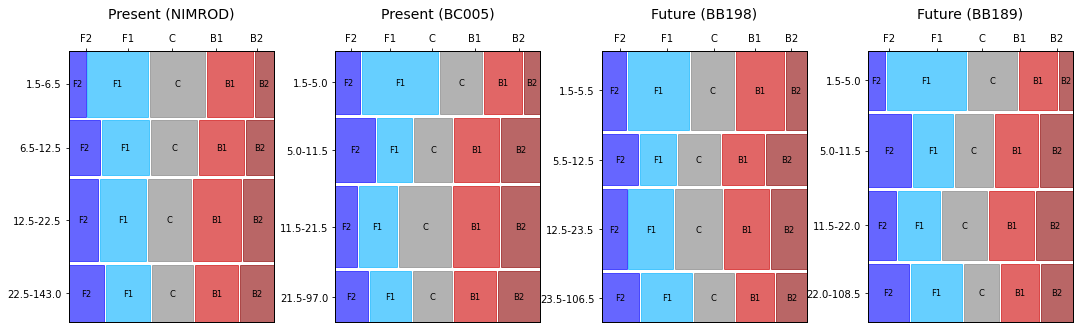

In [510]:
fig, axs = plt.subplots(ncols=4, figsize=(18,5))
fig.subplots_adjust(wspace=0.3)
create_mosaic_plot(axs[0],nimrod_divisibleby5 , cross_variable1 = 'DurationRange_personalised', cross_variable2='Loading_profile_raw_rain', quintile_cats= quintile_cats, include_all= False, filter_events=True)
axs[0].set_title('Present (NIMROD)', fontsize=14, y=1.1)
create_mosaic_plot(axs[1],bc005_divisibleby5 , cross_variable1 = 'DurationRange_personalised', cross_variable2='Loading_profile_raw_rain', quintile_cats= quintile_cats, include_all= False, filter_events=True)
axs[1].set_title('Present (BC005)', fontsize=14, y=1.1)
create_mosaic_plot(axs[2],bb198_divisibleby5 , cross_variable1 = 'DurationRange_personalised', cross_variable2='Loading_profile_raw_rain', quintile_cats= quintile_cats, include_all= False, filter_events=True)
axs[2].set_title('Future (BB198)', fontsize=14, y=1.1)
create_mosaic_plot(axs[3],bb189_divisibleby5 , cross_variable1 = 'DurationRange_personalised', cross_variable2='Loading_profile_raw_rain', quintile_cats= quintile_cats, include_all= False, filter_events=True)
axs[3].set_title('Future (BB189)', fontsize=14, y=1.1);

## Summer only
(categories no longer all the same size because they were calculated to be all the same size using the full dataset)

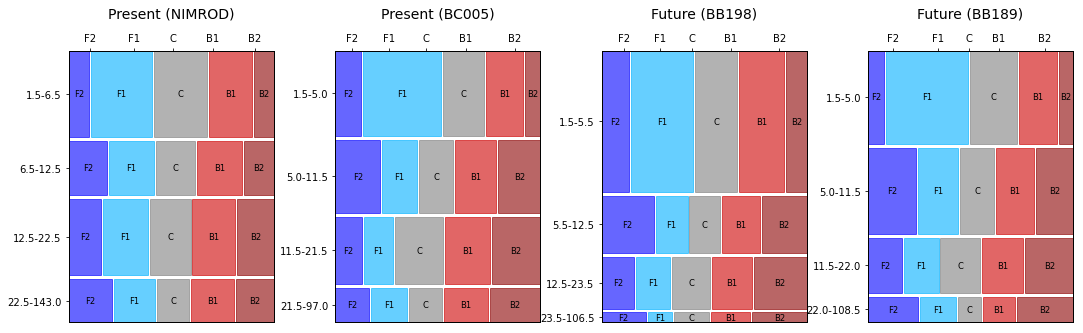

In [789]:
fig, axs = plt.subplots(ncols=4, figsize=(18,5))
fig.subplots_adjust(wspace=0.3)
create_mosaic_plot(axs[0],nimrod_summer_divisibleby5 , cross_variable1 = 'DurationRange_personalised', cross_variable2='Loading_profile_raw_rain', quintile_cats= quintile_cats, include_all= False, filter_events=True)
axs[0].set_title('Present (NIMROD)', fontsize=14, y=1.1)
create_mosaic_plot(axs[1],bc005_summer_divisibleby5 , cross_variable1 = 'DurationRange_personalised', cross_variable2='Loading_profile_raw_rain', quintile_cats= quintile_cats, include_all= False, filter_events=True)
axs[1].set_title('Present (BC005)', fontsize=14, y=1.1)
create_mosaic_plot(axs[2],bb198_summer_divisibleby5 , cross_variable1 = 'DurationRange_personalised', cross_variable2='Loading_profile_raw_rain', quintile_cats= quintile_cats, include_all= False, filter_events=True)
axs[2].set_title('Future (BB198)', fontsize=14, y=1.1)
create_mosaic_plot(axs[3],bb189_summer_divisibleby5 , cross_variable1 = 'DurationRange_personalised', cross_variable2='Loading_profile_raw_rain', quintile_cats= quintile_cats, include_all= False, filter_events=True)
axs[3].set_title('Future (BB189)', fontsize=14, y=1.1);

# Mosaic plots - split by season

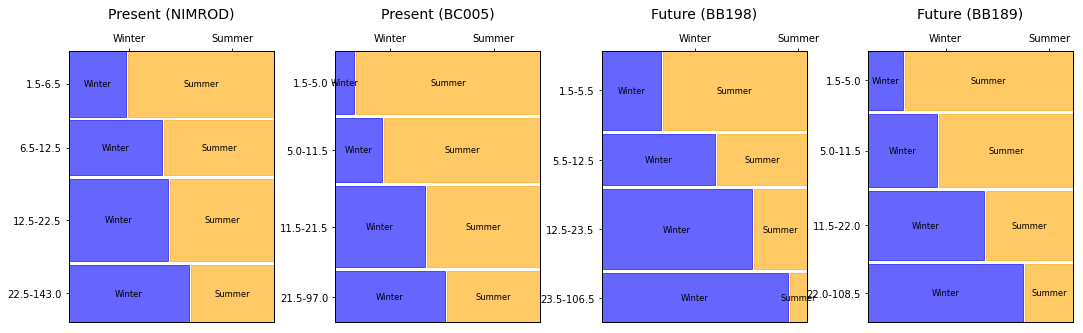

In [707]:
fig, axs = plt.subplots(ncols=4, figsize=(18,5))
fig.subplots_adjust(wspace=0.3)
create_mosaic_plot(axs[0],nimrod_divisibleby5 , cross_variable1 = 'DurationRange_personalised', cross_variable2='season', quintile_cats= quintile_cats_season, include_all= False, filter_events=True)
axs[0].set_title('Present (NIMROD)', fontsize=14, y=1.1)
create_mosaic_plot(axs[1],bc005_divisibleby5 , cross_variable1 = 'DurationRange_personalised', cross_variable2='season', quintile_cats= quintile_cats_season, include_all= False, filter_events=True)
axs[1].set_title('Present (BC005)', fontsize=14, y=1.1)
create_mosaic_plot(axs[2],bb198_divisibleby5 , cross_variable1 = 'DurationRange_personalised', cross_variable2='season', quintile_cats= quintile_cats_season, include_all= False, filter_events=True)
axs[2].set_title('Future (BB198)', fontsize=14, y=1.1)
create_mosaic_plot(axs[3],bb189_divisibleby5 , cross_variable1 = 'DurationRange_personalised', cross_variable2='season', quintile_cats= quintile_cats_season, include_all= False, filter_events=True)
axs[3].set_title('Future (BB189)', fontsize=14, y=1.1);

# Plot profiles clouds

In [329]:
# plot_profiles_by_percentile(ukcp18_future, percent_10=95, percent_1=99)

In [325]:
# plot_profiles_by_percentile(ukcp18_present, percent_10=95, percent_1=99)

In [326]:
# plot_profiles_by_percentile(ukcp18_present_divisibley5, percent_10=90, percent_1=99)

In [327]:
# plot_profiles_by_percentile(nimrod, percent_10=90, percent_1=99)

In [328]:
# plot_profiles_by_percentile(nimrod_divisibley5, percent_10=90, percent_1=99)

### Plot profiles

In [774]:
def create_kmeans_centroids(data, num_clusters):
    data = data[data['interpolated12_incremental_rainfall'].notna()]
    profiles = np.array(data['interpolated12_incremental_rainfall'].tolist())
    # Create and fit the model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(profiles)

    # Get cluster labels for each profile
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    return labels, centroids

def plot_centroids(axs, row, centroids, color):
    for num, centroid_cumulative in enumerate(centroids):

        # Time in hours
        time_hours = np.arange(len(centroid_cumulative))  

        # Convert cumulative to intensity (mm/hour)
        #intensity = np.diff(centroid_cumulative) / np.diff(time_hours)
        intensity = centroid_cumulative
        # Calculate average intensity
        average_intensity = np.sum(intensity) / (time_hours[-1] - time_hours[0])

        # Normalize intensity by average intensity
        normalized_intensity = intensity / average_intensity

        # Find portion which is heaviest
        # heaviest_segment = categorize_normalized_rainstorm(centroid_cumulative)
        quintile_with_max_value = find_quintile_with_max_value(intensity)
        i = quintile_with_max_value
        
        axs[row, i].plot(time_hours, normalized_intensity, color=color, linestyle='-')
        
        if row == 0:
            axs[row, i].set_title(f'Quintile {i + 1}')  

In [779]:
# data=nimrod.copy()
# data = data[data['interpolated15_cumulative_normalized_rainfall'].notna()]
# data.columns
# plt.plot(data['interpolated12_incremental_rainfall'][10])
# data['interpolated12_incremental_rainfall']

In [730]:
def create_incremental_event(cumulative_rainfall):
    if cumulative_rainfall is None :
        return None
    
    raw_rainfall = np.diff(cumulative_rainfall, prepend=0)
    raw_rainfall[0] = cumulative_rainfall[0]
    return raw_rainfall

In [775]:
# fig, ax = plt.subplots(figsize=(13, 8), sharey=True)
# # ax.plot(nimrod_centroids_5clusters[0])
# # ax.plot(create_incremental_event(nimrod_centroids_5clusters[0]))
# # ax.plot(create_incremental_event(nimrod_centroids_5clusters[1]))
# ax.plot(create_incremental_event(nimrod_centroids_5clusters[2]))
# # ax.plot(nimrod_centroids_5clusters[2])
# # ax.plot(create_incremental_event(nimrod_centroids_5clusters[3]))
# # ax.plot(create_incremental_event(nimrod_centroids_5clusters[4]))

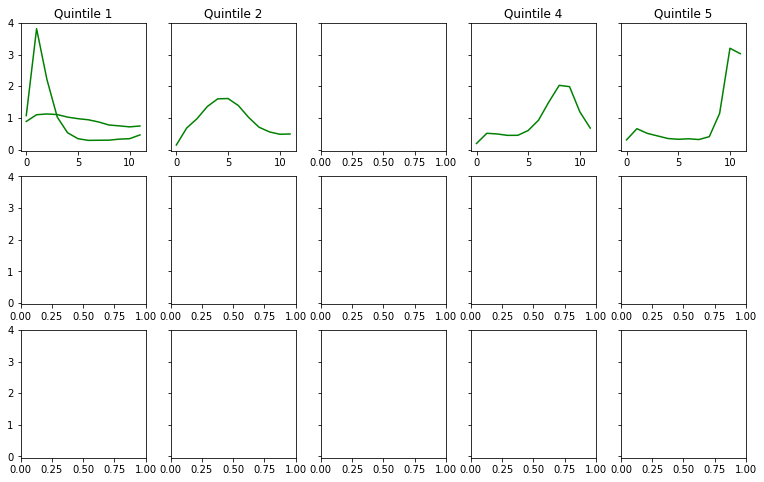

In [778]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(13, 8), sharey=True)

# labels, nimrod_centroids_5clusters = create_kmeans_centroids(nimrod, 5)
labels, bc005_centroids_5clusters = create_kmeans_centroids(bc005, 5)
# bb198_centroids_5clusters = create_kmeans_centroids(bb198, 5)
# bb189_centroids_5clusters = create_kmeans_centroids(bb189, 5)

# plot_centroids(axs,0, nimrod_centroids_5clusters, 'black')
plot_centroids(axs,0, bc005_centroids_5clusters, 'green')
# plot_centroids(axs,0, bb189_centroids_5clusters, 'blue')
# plot_centroids(axs,0, bb198_centroids_5clusters, 'purple')

# plot_centroids(axs,1, ukcp18_centroids_15clusters, 'blue')
# plot_centroids(axs,1, nimrod_centroids_15clusters, 'black')

# # ukcp18_centroids_15clusters = create_kmeans_centroids(ukcp18_interpolated_profiles, 15)
# # nimrod_centroids_15clusters = create_kmeans_centroids(nimrod_interpolated_profiles, 15)

# plot_centroids(axs,2, ukcp18_centroids_15clusters, 'blue')
# plot_centroids(axs,2, nimrod_centroids_15clusters, 'black')

### Contingency tables

In [ ]:
def create_absolute_contingency_table(data, column):
    # Create a contingency table with absolute counts
    contingency_table = pd.crosstab(data[column], data['Loading'])

    # Calculate the overall sum for each loading category
    overall_counts = contingency_table.sum(axis=0)  # Sum across all duration categories

    # Add the 'All' row with the overall counts
    contingency_table.loc['All'] = overall_counts

    # Convert the absolute contingency table to a list of lists for tabulate
    table_data = contingency_table.reset_index().values.tolist()
    headers = [column] + list(contingency_table.columns)

    # Print the formatted table using tabulate
    print("Absolute Contingency Table with 'All' Row:")
    print(tabulate(table_data, headers=headers, tablefmt='pretty'))    

In [211]:
create_absolute_contingency_table(ukcp18_present_divisibleby5, "DurationRange_personalised")

Absolute Contingency Table with 'All' Row:
+----------------------------+------+------+------+------+------+
| DurationRange_personalised |  F2  |  F1  |  C   |  B1  |  B2  |
+----------------------------+------+------+------+------+------+
|          2.0-5.5           | 1122 | 2529 | 1507 | 1400 | 753  |
|          5.5-11.5          | 740  | 674  | 823  | 949  | 870  |
|         11.5-20.0          | 715  | 1261 | 1839 | 1527 | 1317 |
|         20.0-97.0          | 824  | 1056 | 985  | 1124 | 1146 |
|            All             | 3401 | 5520 | 5154 | 5000 | 4086 |
+----------------------------+------+------+------+------+------+


In [213]:
create_absolute_contingency_table(ukcp18_present, "DurationRange_personalised")

Absolute Contingency Table with 'All' Row:
+----------------------------+-------+-------+-------+-------+-------+
| DurationRange_personalised |  F2   |  F1   |   C   |  B1   |  B2   |
+----------------------------+-------+-------+-------+-------+-------+
|          2.0-5.5           | 7174  | 9282  | 5444  | 4191  | 1676  |
|          5.5-11.5          | 6211  | 5489  | 5747  | 5558  | 4761  |
|         11.5-20.0          | 3734  | 6039  | 7044  | 5959  | 4990  |
|         20.0-97.0          | 4738  | 6294  | 5502  | 5817  | 5415  |
|            All             | 21857 | 27104 | 23737 | 21525 | 16842 |
+----------------------------+-------+-------+-------+-------+-------+


In [214]:
create_contingency_table(ukcp18_present, "DurationRange_personalised")

Proportional Contingency Table with 'All' Row:
+------------------+------+------+------+------+------+
| DurationCategory |  F2  |  F1  |  C   |  B1  |  B2  |
+------------------+------+------+------+------+------+
|     2.0-5.5      | 25.8 | 33.4 | 19.6 | 15.1 | 6.0  |
|     5.5-11.5     | 22.4 | 19.8 | 20.7 | 20.0 | 17.1 |
|    11.5-20.0     | 13.4 | 21.7 | 25.4 | 21.5 | 18.0 |
|    20.0-97.0     | 17.1 | 22.7 | 19.8 | 21.0 | 19.5 |
|       All        | 19.7 | 24.4 | 21.4 | 19.4 | 15.2 |
+------------------+------+------+------+------+------+


In [212]:
create_contingency_table(ukcp18_present_divisibleby5, "DurationRange_personalised")

Proportional Contingency Table with 'All' Row:
+------------------+------+------+------+------+------+
| DurationCategory |  F2  |  F1  |  C   |  B1  |  B2  |
+------------------+------+------+------+------+------+
|     2.0-5.5      | 15.3 | 34.6 | 20.6 | 19.1 | 10.3 |
|     5.5-11.5     | 18.2 | 16.6 | 20.3 | 23.4 | 21.4 |
|    11.5-20.0     | 10.7 | 18.9 | 27.6 | 22.9 | 19.8 |
|    20.0-97.0     | 16.0 | 20.6 | 19.2 | 21.9 | 22.3 |
|       All        | 14.7 | 23.8 | 22.3 | 21.6 | 17.6 |
+------------------+------+------+------+------+------+
